In [1]:
#importaciones
from IPython.display import HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
%matplotlib inline 
plt.style.use('default')
import datetime
import math
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
df_postulaciones = pd.read_csv("../datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=['fechapostulacion'])
df_avisos_detalle = pd.read_csv("../datos_navent_fiuba/fiuba_6_avisos_detalle.csv")

In [18]:
df_posts_avisos = df_avisos_detalle.merge(df_postulaciones, on='idaviso')
df_posts_avisos['fecha'] = df_posts_avisos['fechapostulacion'].dt.date

                               nombre_area  count      perc
10                            Contabilidad  55563  1.807394
11         Almacén / Depósito / Expedición  53261  1.732512
12                             Gastronomia  51213  1.665894
13                        Recursos Humanos  45668  1.485522
14                              Secretaria  39188  1.274736
15                               Logística  37139  1.208084
16              Administración de Personal  37011  1.203921
17                    Créditos y Cobranzas  36690  1.193479
18                               Marketing  29861  0.971340
19                                   Legal  29295  0.952929
20                            Farmacéutica  29241  0.951172
21                         Soporte Técnico  29048  0.944894
22                           Mantenimiento  28462  0.925833
23                               Camareros  27482  0.893954
24                                 Compras  23921  0.778120
25                                Finanz

In [97]:
def graficar_top_n_postulaciones(N, clave_agrupacion, clave_titulo, x_tick_step=1):
    df_posts_agrupado =  df_posts_avisos.groupby(clave_agrupacion)\
                                        .agg({'idpostulante':'count'})\
                                        .rename(columns={'idpostulante': 'count'})

    tot = df_posts_agrupado['count'].sum()

    df_posts_agrupado['perc'] = df_posts_agrupado['count'] * 100.0 / tot
    df_posts_agrupado = df_posts_agrupado.sort_values(by='count', ascending=False)
    df_posts_agrupado = df_posts_agrupado.reset_index()

    df_top_posts = pd.DataFrame(df_posts_agrupado.head(N))

    cant_restantes = df_posts_agrupado.loc[N:,:]['count'].sum()

    print(cant_restantes)
    print(tot)
    
    df_top_posts.loc[N,:] = ['Otros', cant_restantes, cant_restantes * 100 / tot]

    max_perc = math.ceil(df_top_posts['perc'].max())
    xticks = np.arange(0, max_perc, x_tick_step)

    g = sns.barplot(x=df_top_posts['perc'], y=df_top_posts[clave_agrupacion], orient='h',
                    palette=sns.color_palette("hls", N))
    g.set_title("Top {0} de postulaciones por {1}".format(N, clave_titulo.lower()), fontsize=15)
    g.set_xlabel("Postulaciones (%)", fontsize=12)
    g.set_ylabel(clave_titulo, fontsize=12)
    g.set(xticks=xticks);
    
    return g

1192342
3074206


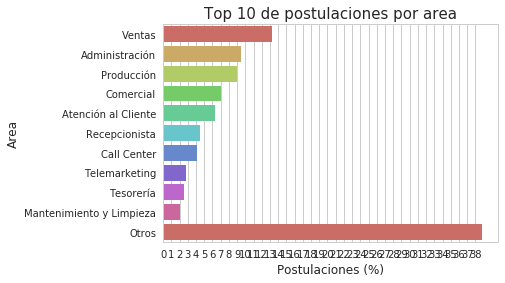

In [98]:
graficar_top_n_postulaciones(10, 'nombre_area', 'Area')

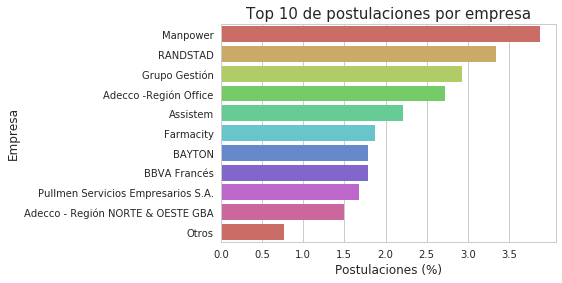

In [90]:
graficar_top_n_postulaciones(20, 'denominacion_empresa', 'Empresa', x_tick_step=0.5)

         nombre_area       fecha  count          perc
0     Abastecimiento  2018-01-15    228  7.416549e-05
1     Abastecimiento  2018-01-16    169  5.497354e-05
2     Abastecimiento  2018-01-17    161  5.237125e-05
3     Abastecimiento  2018-01-18    303  9.856204e-05
4     Abastecimiento  2018-01-19    425  1.382471e-04
5     Abastecimiento  2018-01-20    174  5.659998e-05
6     Abastecimiento  2018-01-21    128  4.163677e-05
7     Abastecimiento  2018-01-22    297  9.661031e-05
8     Abastecimiento  2018-01-23    196  6.375630e-05
9     Abastecimiento  2018-01-24    493  1.603666e-04
10    Abastecimiento  2018-01-25    268  8.717698e-05
11    Abastecimiento  2018-01-26    193  6.278044e-05
12    Abastecimiento  2018-01-27     98  3.187815e-05
13    Abastecimiento  2018-01-28    130  4.228734e-05
14    Abastecimiento  2018-01-29    413  1.343436e-04
15    Abastecimiento  2018-01-30    304  9.888732e-05
16    Abastecimiento  2018-01-31    215  6.993676e-05
17    Abastecimiento  2018-0

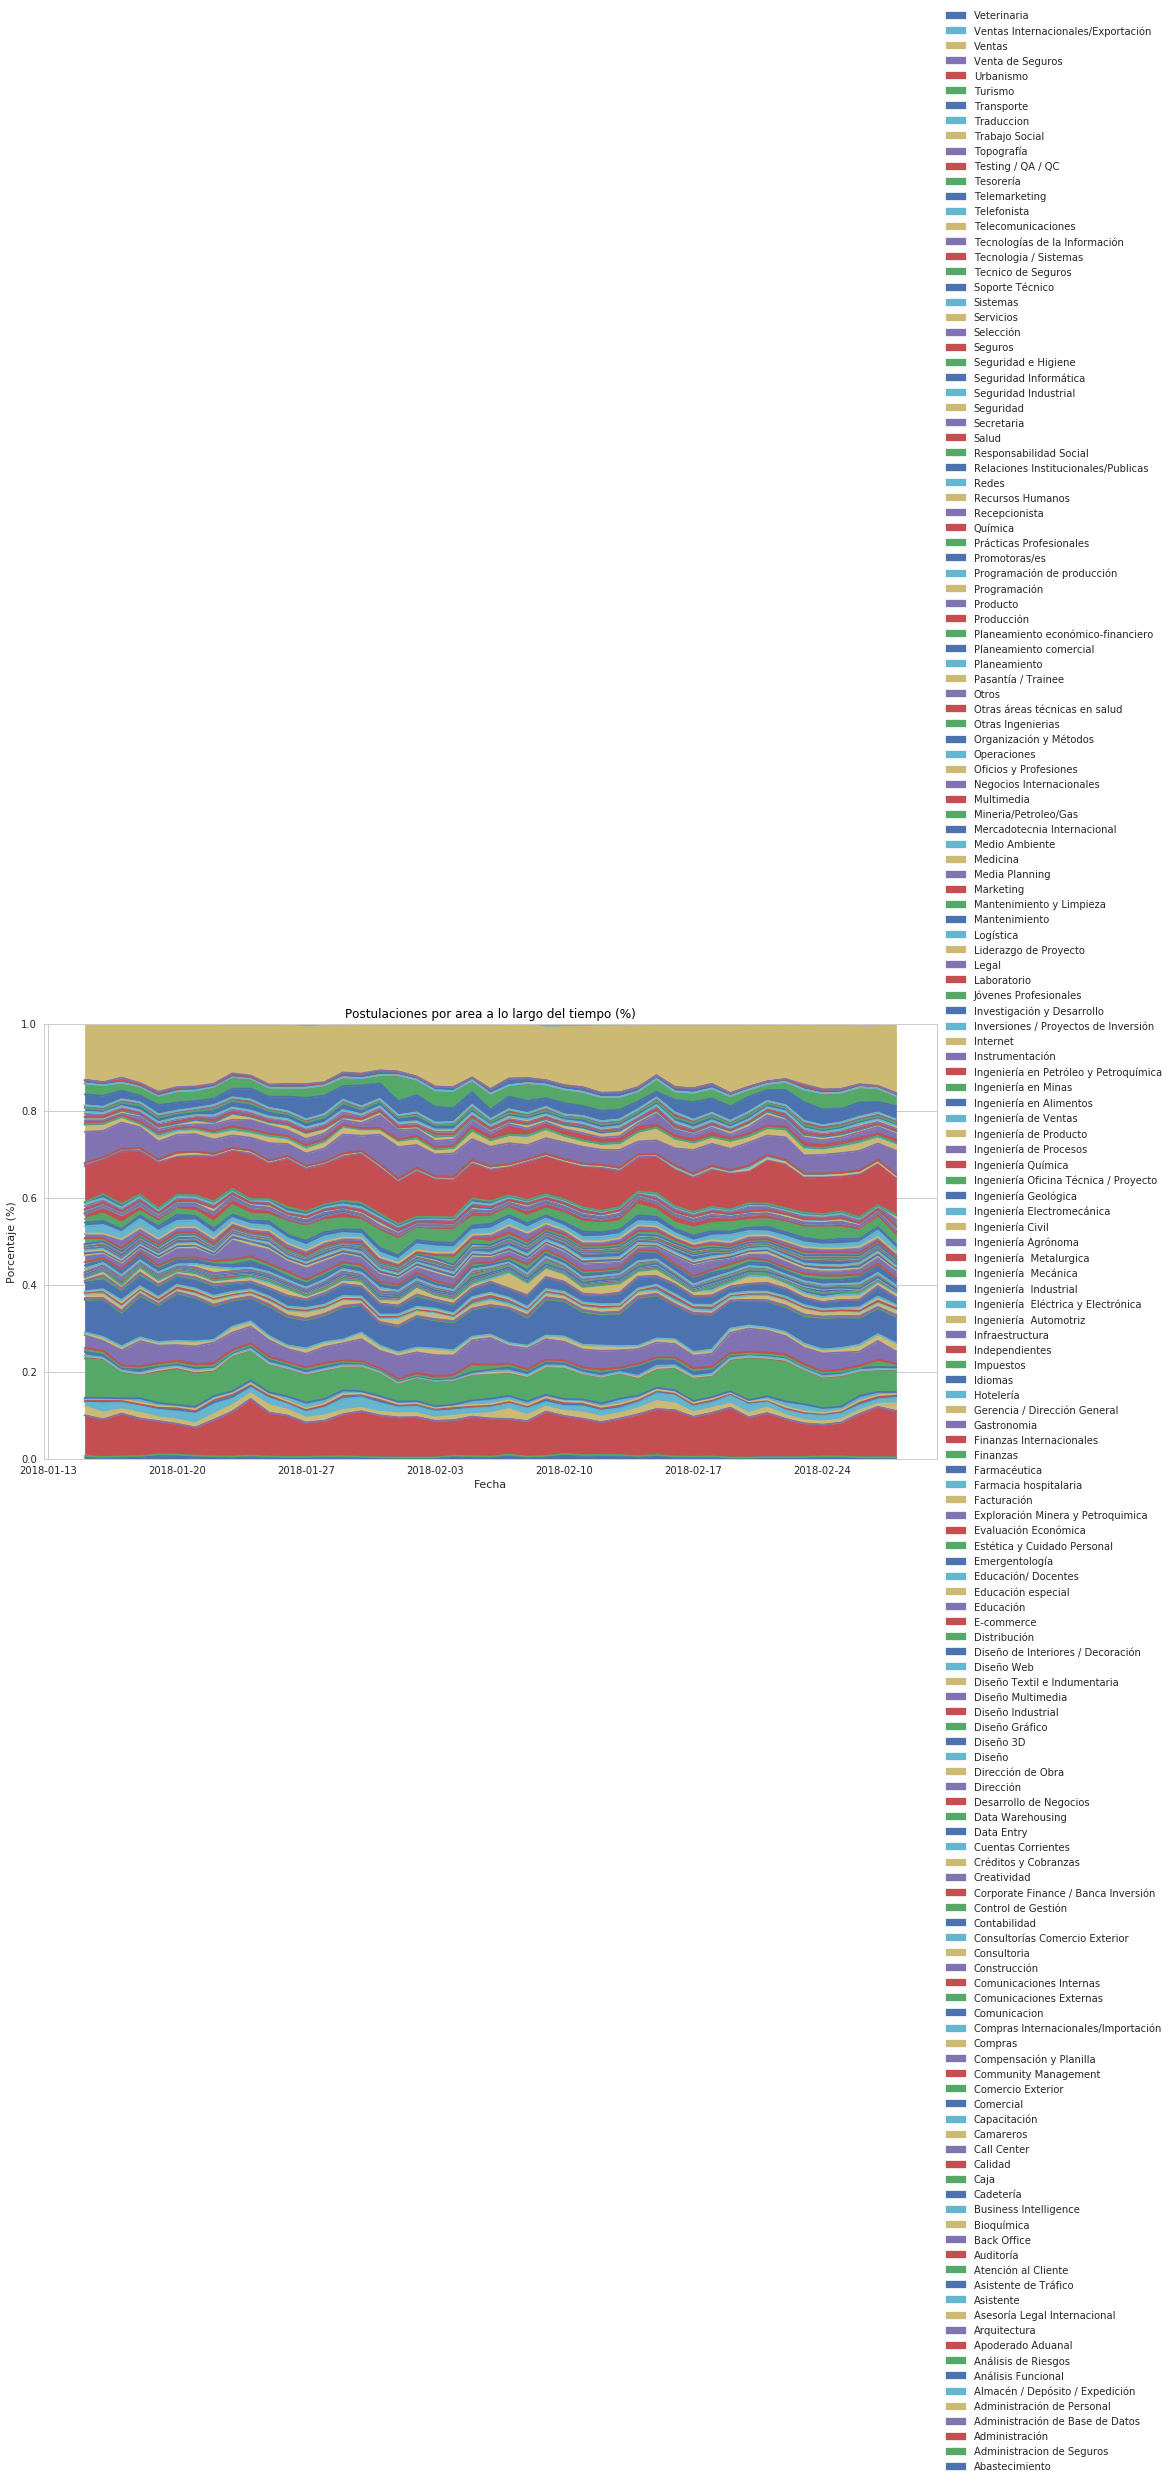

In [10]:
# TODO: ver si se puede hacer alguna grafica con la evolucion en el tiempo
df = df_posts_avisos.groupby(['nombre_area', 'fecha'])\
                    .size()\
                    .reset_index()\
                    .rename(columns={0:'count'})
tot = df['count'].sum()
df['perc'] = df['count'] / tot

pivoted = pd.pivot_table(df, values='perc', columns='nombre_area', \
                         index='fecha')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Postulaciones por area a lo largo del tiempo (%)', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Porcentaje (%)');
ax.set_xlabel('Fecha');
ax.set_ylim(0,1)
plt.show()